In [13]:
import pandas as pd
import numpy as np
import pandas_datareader as web
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta

In [14]:
#We will predict the next market close
#First get the last 100 days of full data
#today's date
today = dt.datetime.today()
#set up params for start and end date
end = today
start = today - timedelta(100)

In [16]:
#get apple stock price info for last 100 days
df = web.DataReader('TSLA', data_source='yahoo', start=start, end=end)
df["next_day_close"] = df["Close"].shift(-1)
df["next_day_performance"] = (df["next_day_close"] - df["Close"])/df["Close"]
df = df.dropna()
df['is_positive'] = np.where(df['next_day_performance'] > 0, 1, 0)
df['datarow'] = np.arange(len(df))+1
df = df.reset_index()
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,next_day_close,next_day_performance,is_positive,datarow
64,2020-05-08,824.000000,787.010010,793.770020,819.419983,16130100,819.419983,811.289978,-0.009922,0,65
65,2020-05-11,824.000000,785.000000,790.510010,811.289978,16471100,811.289978,809.409973,-0.002317,0,66
66,2020-05-12,843.289978,808.000000,827.000000,809.409973,15906900,809.409973,790.960022,-0.022794,0,67
67,2020-05-13,826.000000,763.299988,820.830017,790.960022,19065500,790.960022,803.330017,0.015639,1,68
68,2020-05-14,803.359985,764.000000,780.000000,803.330017,13637500,803.330017,799.169983,-0.005178,0,69


In [4]:
#Create the variables for independent and dependent variables
dates = []
prices = []

In [5]:
df.shape

(69, 11)

In [6]:
#Get the last row of data - this will be the data we test on
df.tail(1)

,Date,High,Low,Open,Close,Volume,Adj Close,next_day_close,next_day_performance,is_positive,datarow
68,2020-05-14,803.359985,764.0,780.0,803.330017,13637500,803.330017,799.169983,-0.005178,0,69


In [7]:
#Get all the data except the last row
df2 = df.head(len(df)-1)
df2

,Date,High,Low,Open,Close,Volume,Adj Close,next_day_close,next_day_performance,is_positive,datarow
0,2020-02-06,795.830017,687.000000,699.919983,748.960022,39880800,748.960022,748.070007,-0.001188,0,1
1,2020-02-07,769.750000,730.000000,730.549988,748.070007,17063500,748.070007,771.280029,0.031027,1,2
2,2020-02-10,819.989990,752.400024,800.000000,771.280029,24689200,771.280029,774.380005,0.004019,1,3
3,2020-02-11,783.510010,758.000000,768.789978,774.380005,11697500,774.380005,767.289978,-0.009156,0,4
4,2020-02-12,789.750000,763.369995,777.869995,767.289978,12022500,767.289978,804.000000,0.047844,1,5
...,...,...,...,...,...,...,...,...,...,...,...
63,2020-05-07,796.400024,772.349976,777.210022,780.039978,11527700,780.039978,819.419983,0.050485,1,64
64,2020-05-08,824.000000,787.010010,793.770020,819.419983,16130100,819.419983,811.289978,-0.009922,0,65
65,2020-05-11,824.000000,785.000000,790.510010,811.289978,16471100,811.289978,809.409973,-0.002317,0,66
66,2020-05-12,843.289978,808.000000,827.000000,809.409973,15906900,809.409973,790.960022,-0.022794,0,67


In [8]:
#new shape of data just to check
df2.shape

(68, 11)

In [9]:
#Get all the rows from the date column
df_dates = df2.loc[:, 'datarow']
df_close = df2.loc[:, 'Close']


In [10]:
#Create the independent dataset (X)
for date in df_dates:
    dates.append( [date])
    
#Create the dependent dataset (y)
for close_price in df_close:
    prices.append(float(close_price))

In [11]:
def predict_prices(dates, prices, x):
    
    #create the 3 support vector regression models
    svr_lin = SVR(kernel='linear', C=1e3)
    svr_poly= SVR(kernel='poly', C=1e3, degree=2)
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    
    #train the SVR models
    svr_lin.fit(dates, prices)
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)
    
    #create linear regression model
    lin_reg = LinearRegression()
    #train linear regression model
    lin_reg.fit(dates, prices)
    
    #plot
    plt.scatter(dates, prices, color='black', label="Data")
    plt.plot(dates, svr_rbf.predict(dates), color='red', label="SVR RBF")
    plt.plot(dates, svr_poly.predict(dates), color='blue', label="SVR POLY")
    plt.plot(dates, svr_lin.predict(dates), color='green', label="SVR Linear")
    plt.plot(dates, lin_reg.predict(dates), color='orange', label="Linear Reg")
    plt.xlabel("Days")
    plt.ylabel("Price")
    plt.title("Regression")
    plt.legend()
    plt.show()
    
    return svr_rbf.predict(x)[0], svr_poly.predict(x)[0], svr_lin.predict(x)[0], lin_reg.predict(x)[0]



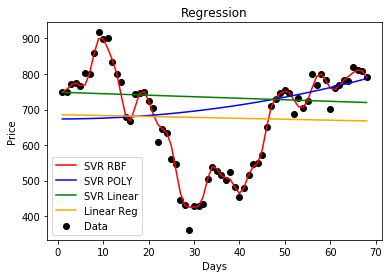

SVR RBF Prediction: 760.17, SVR POLY Prediction: 790.26, SVR LInear Prediction: 719.25, Linear Regression Prediction: 667.62
-------------
Actual Close: 803.33


In [12]:
#predict day 30
predicted_price = predict_prices(dates, prices, [[int(df.tail(1).datarow)]])
print(f"SVR RBF Prediction: {round(predicted_price[0],2)}, SVR POLY Prediction: {round(predicted_price[1],2)}, SVR LInear Prediction: {round(predicted_price[2],2)}, Linear Regression Prediction: {round(predicted_price[3],2)}")
print("-------------")
print(f"Actual Close: {round(float(df.tail(1)['Close']),2)}")

In [17]:
#Make a reusable function where the only input is an array of stocks. 
def multiple_stocks(symbols):
    for symbol in symbols:
        df = web.DataReader(f'{symbol}', data_source='yahoo', start=start, end=end)
        df["next_day_close"] = df["Close"].shift(-1)
        df["next_day_performance"] = (df["next_day_close"] - df["Close"])/df["Close"]
        df = df.dropna()
        df['is_positive'] = np.where(df['next_day_performance'] > 0, 1, 0)
        df['datarow'] = np.arange(len(df))+1
        df = df.reset_index()
        #Create the variables for independent and dependent variables
        dates = []
        prices = []
        #Get all the data except the last row
        df2 = df.head(len(df)-1)
        df_dates = df2.loc[:, 'datarow']
        df_close = df2.loc[:, 'Close']
        #Create the independent dataset (X)
        for date in df_dates:
            dates.append( [date])
        #Create the dependent dataset (y)
        for close_price in df_close:
            prices.append(float(close_price))
        #predict day 30
        predicted_price = predict_prices(dates, prices, [[int(df.tail(1).datarow)]])
        print(f"SVR RBF Prediction: {round(predicted_price[0],2)}, SVR POLY Prediction: {round(predicted_price[1],2)}, SVR LInear Prediction: {round(predicted_price[2],2)}, Linear Regression Prediction: {round(predicted_price[3],2)}")
        print("-------------")
        print(f"Actual Close: {round(float(df.tail(1)['Close']),2)}")

In [18]:
#here's an example we'll just use 3 stocks, Tesla, Apple, and Pfizer
#and using last 100 days we'll compare which stock the model best predicts for. 
symbols = ["TSLA", "AAPL", "PFE"]

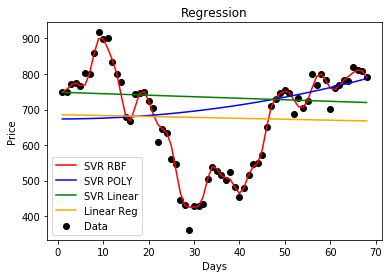

SVR RBF Prediction: 760.17, SVR POLY Prediction: 790.26, SVR LInear Prediction: 719.25, Linear Regression Prediction: 667.62
-------------
Actual Close: 803.33


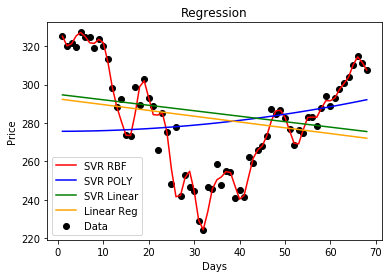

SVR RBF Prediction: 309.15, SVR POLY Prediction: 292.59, SVR LInear Prediction: 275.26, Linear Regression Prediction: 271.77
-------------
Actual Close: 309.54


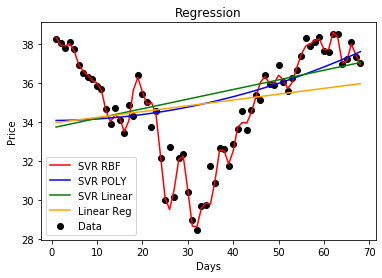

SVR RBF Prediction: 39.1, SVR POLY Prediction: 37.72, SVR LInear Prediction: 37.11, Linear Regression Prediction: 36.0
-------------
Actual Close: 37.92


In [19]:
#run the function
multiple_stocks(symbols)